# Cesar Cypher

Facciamo degli import preliminari di quello che ci serve


In [31]:
#@title funzione per convertire una lista in una stringa
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1 

In [32]:
#@title Librerie

import matplotlib.pyplot as plt
import numpy as np
import collections

In [33]:
#@title Alfabeto di codifica

alphabet = {
        'a' : 0, 
        'b' : 1, 
        'c' : 2, 
        'd' : 3, 
        'e' : 4, 
        'f' : 5, 
        'g' : 6, 
        'h' : 7, 
        'i' : 8, 
        'j' : 9, 
        'k' : 10, 
        'l' : 11, 
        'm' : 12, 
        'n' : 13, 
        'o' : 14, 
        'p' : 15, 
        'q' : 16, 
        'r' : 17, 
        's' : 18, 
        't' : 19, 
        'u' : 20, 
        'v' : 21, 
        'w' : 22, 
        'x' : 23, 
        'y' : 24, 
        'z' : 25
    }

In [34]:
#@title Alfabeto di decodifica
decodealphabet = {
        0 : 'a', 
        1 : 'b', 
        2 : 'c', 
        3 : 'd', 
        4 : 'e', 
        5 : 'f', 
        6 : 'g', 
        7 : 'h', 
        8 : 'i', 
        9 : 'j', 
        10 : 'k', 
        11 : 'l', 
        12 : 'm', 
        13 : 'n', 
        14 : 'o', 
        15 : 'p', 
        16 : 'q', 
        17 : 'r', 
        18 : 's', 
        19 : 't', 
        20 : 'u', 
        21 : 'v', 
        22 : 'w', 
        23 : 'x', 
        24 : 'y', 
        25 : 'z'
    }

In [35]:
#@title Frequenze lettere lingua inglese

letterFrequency = {'E' : 12.0,
'T' : 9.10,
'A' : 8.12,
'O' : 7.68,
'I' : 7.31,
'N' : 6.95,
'S' : 6.28,
'R' : 6.02,
'H' : 5.92,
'D' : 4.32,
'L' : 3.98,
'U' : 2.88,
'C' : 2.71,
'M' : 2.61,
'F' : 2.30,
'Y' : 2.11,
'W' : 2.09,
'G' : 2.03,
'P' : 1.82,
'B' : 1.49,
'V' : 1.11,
'K' : 0.69,
'X' : 0.17,
'Q' : 0.11,
'J' : 0.10,
'Z' : 0.07 }

# Frequenza convertite delle lettere nella lingua inglese

I valori sopra sono frequenze espresse in percentuale. A me servono le freuenze espresse come numeri compresi tra 0 ed 1

In [36]:
for key, value in letterFrequency.items():
    # do something with value
    letterFrequency[key] = letterFrequency[key]/100
letterFrequency

{'A': 0.0812,
 'B': 0.0149,
 'C': 0.0271,
 'D': 0.0432,
 'E': 0.12,
 'F': 0.023,
 'G': 0.0203,
 'H': 0.0592,
 'I': 0.0731,
 'J': 0.001,
 'K': 0.0069,
 'L': 0.0398,
 'M': 0.026099999999999998,
 'N': 0.0695,
 'O': 0.0768,
 'P': 0.0182,
 'Q': 0.0011,
 'R': 0.0602,
 'S': 0.06280000000000001,
 'T': 0.091,
 'U': 0.0288,
 'V': 0.0111,
 'W': 0.0209,
 'X': 0.0017000000000000001,
 'Y': 0.021099999999999997,
 'Z': 0.0007000000000000001}

# Sommatoria dei quadrati delle frequnze delle lettere della lingua inglese

Se prendiamo tutte le frequenze delle lettere della lingua inglese, ne facciamo il quadrato e sommiamo questi quadrati, uscirà il seguente numero:

$ \sum_{i=0}^{25} p_i^{2} = 0.065$

Questo numero è importante in quanto dopo ci servirà. per adesso ce lo conserviamo.

In [37]:
somma = 0
valori = letterFrequency.values( )

for x in valori:
  somma = somma + (x * x)

# Print della somma
somma


0.06466717000000001

## Visualizzazione delle frequenze delle lettere della lingua inglese mediante istogramma

Ordino prima le frequenze dalla più piccola alla più grande e poi traccio l'istogramma relativo alla frequenza delle lettere nella lingua inglese.

<BarContainer object of 26 artists>

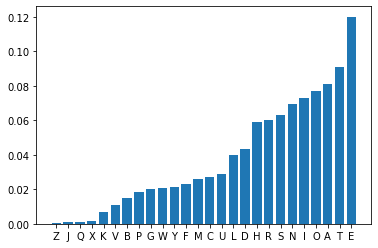

In [38]:
# Sorting dei valori dal meno frequente al più frequente
letterFrequency={k: v for k, v in sorted(letterFrequency.items(), key=lambda item: item[1])}
keys = letterFrequency.keys()
values = letterFrequency.values()

plt.bar(keys, values)

# Primo metodo - analisi delle frequenze

Se stiamo considerando un messaggio cifrato mono-alfabetico, ovvero cambiamo ogni lettera dell'alfabeto originale con un'altra lettera, possiamo applicare l'analisi della frequenza delle lettere nel cifrato. Questa tecnica si basa sull'idea che anche se una lettera "cambia abito" la frequenza con la quale viene usata è uguale a quella originale, e dunque essa può aiutare a smascherare questi travestimenti, sino ad arrivare a capire come sono state sostituite le lettere. Questo è un approccio euristico. Ovvero, una volta ricavata la frequenza delle lettere nel cifrato, tramite comparazioni ed assunzioni che possiamo fare, in base anche a delle conoscenze a priori, giungiamo per tentativi a trovare la soluzione.

# Messaggio da decifrare

In [39]:
messaggio ="WKHTXLFNEURZQIRAMXPSVRYHUWKHODCBGRJVSDFHVSDFHWKLVLVDILUVWHADPSOHRIKRZFUBSWRJUDSKBZRUNVIXOOVWRSWKLVZDBRIFUDFNLQJDFRGHRQOBZRUNVZKHQBRXKDYHDSDUDJUDSKWKDWLVODUJHHQRXJKWRFRQWDLQDOODWKHOHWWHUVRIWKHHQJOLVKDOSKDEHWLQRUGHUWRUHIOHFWWKHLQLWLDOGLVWULEXLWLRQRIIUHTXHQFLHVIXOOVWRS"
#messaggio="OVDTHUFWVZZPISLRLFZHYLAOLYL" how many possible keys are there 
#messaggio="JGRMQOYGHMVBJWRWQFPWHGFFDQGFPFZRKBEEBJIZQQOCIBZKLFAFGQVFZFWWEOGWOPFGFHWOLPHLRLOLFDMFGQWBLWBWQOLKFWBYLBLYLFSFLJGRMQBOLWJVFPFWQVHQWFFPQOQVFPQOCFPOGFWFJIGFQVHLHLROQVFGWJVFPFOLFHGQVQVFILEOGQILHQFQGIQVVOSFAFGBWQVHQWIJVWJVFPFWHGFIWIHZZRQGBABHZQOCGFHX"

## Frequenza delle lettere contenute nel messaggio

Con questo codice vado a calcolare la frequenza di ogni lettera contenuta nel messaggio da decifrare e le salvo come coppia chiave/valore in un dizionario.

In [40]:
all_freq = {}
  
for i in messaggio:
    if i in all_freq:
        all_freq[i] += 1
    else:
        all_freq[i] = 1
  
# printing result 
print ("Count of all characters in GeeksforGeeks is :\n "+  str(all_freq))

Count of all characters in GeeksforGeeks is :
 {'W': 23, 'K': 16, 'H': 25, 'T': 2, 'X': 8, 'L': 18, 'F': 10, 'N': 4, 'E': 3, 'U': 17, 'R': 23, 'Z': 6, 'Q': 12, 'I': 10, 'A': 2, 'M': 1, 'P': 2, 'S': 11, 'V': 16, 'Y': 2, 'O': 15, 'D': 22, 'C': 1, 'B': 6, 'G': 4, 'J': 7}


## Istogramma delle frequenze delle lettere contenute nel messagio da decifrare


Questo istogramma rappresenta le frequenze delle lettere contenute nel messaggio da decifrare.

<BarContainer object of 26 artists>

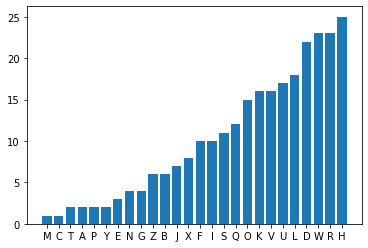

In [41]:
# Sorting dei valori dal meno frequente al più frequente
all_freq={k: v for k, v in sorted(all_freq.items(), key=lambda item: item[1])}

keys = all_freq.keys()
values = all_freq.values()
plt.bar(keys, values)

## Decodificare un messaggio criptato con il metodo Cesar Cypher

Questo approccio si basa sulle seguenti assunzioni:
*   Un messaggio cifrato secondo il Cesar Cypher usa le stesse lettere dell'alfabeto, ma shiftate verso sinistra o verso destra di un numero **k** di posizioni. Questo **k** viene chiamata chiave.
*   Anche dopo lo shift, le frequenze originali delle lettere della lingua inglese rimangono invariate. Di conseguenza, la lettera più frequente nel messaggio cifrato è altamente verosimile sia la lettera **e**
* Di conseguenza considerando la distanza tra la lettere cifrata più frequente, e la lettera e, possiamo capire **la quantità k di shift**
* Eseguendo uno shift dunque di quantità k, nella direzione opposto alla quale è stato fatto lo shift per la codifica, possiamo decodificare il messaggio.





---



A questo punto, dopo aver mostrato le distribuzioni di probabilità di ogni lettera, sia dell'alfabeto inglese che nel messaggio possiamo esserci fatta una idea di quanto vale lo shift **k** . Quindi facciamo lo shift di -k per decodificare il messaggio.

In [42]:
# Mappo il messaggio da decifrare con i numeri di alphabet
messaggioMappato=[]
for c in messaggio:
  lettera = c.lower()
  messaggioMappato.append(alphabet[lettera])

# Shift del messaggio con chiave k= 3 mod 25
messaggioMappato=np.asarray(messaggioMappato)

messaggioShiftato=[]
for x in messaggioMappato:
  messaggioShiftato.append((x-7)%26)
 

# Riconverto il messaggio in lettere in modo da poterlo leggere
messaggioConvertito=[]
for numero in messaggioShiftato:
  messaggioConvertito.append(decodealphabet[numero])

# converto il vettore di caratteri in una semplice stringa
# Riconverto il messaggio in una stringa
shiftatoToList=listToString(messaggioConvertito)

# Diamo uno sguardo al messaggio shiftato, convertito adesso in una stringa
shiftatoToList

'pdamqeygxnksjbktfqilokranpdahwvuzkcolwyaolwyapdeoeowbenopatwilhakbdksynulpkcnwlduskngobqhhopklpdeoswukbynwygejcwykzakjhuskngosdajukqdwrawlwnwcnwldpdwpeohwncaajkqcdpkykjpwejwhhwpdahappanokbpdaajcheodwhldwxapejknzanpknabhayppdaejepewhzeopnexqepekjkbbnamqajyeaobqhhopkl'

Questo approccio però richiede l'intervento dell'essere umano che deve analizzare il grafico e fare delle deduzioni. Possiamo automatizzare il processo nel modo seguente.

# Approccio alternativo

Questo approccio lo posso usare per automatizzare il processo di de-cifratura. Piuttosto quindi che coinvolgere l'essere umano nel fare una stima su quale lettera è la più frequente nel messaggio cifrato, ci affidiamo a quel numero che abbiamo calcolato all'inizio di questo notebook. 

$ I_k = \sum_{i=0}^{25} p_i^{2} = 0.065$

Questo numero è la sommatoria dei quadrati delle frequenze delle lettere della lingua inglese. Adesso, per ogni possibile shift j=0,..., 25 faccio la seguente sommatoria:

$ I_j=\sum_{i=0}^{25} p_i*q_{i+j} = 0.065$

* dove $0\leq q_{i+j} \leq I$ è la frequenza della i-esima lettera nel cifrato. Ovvero la frequenza della lettera shiftata.
* e $0\leq p_i \leq I$ è la frequenza della i-esima lettera nell'alfabeto inglese.

Ovvero, si otterrà che se per un certo shift **j** il valore di quella sommatoria si approssima a 0.065 allora j=k ovvero j è proprio la mia chiave, e quindi sostanzialmente ci siamo ricondotti a:

$ I_k = \sum_{i=0}^{25} p_i*p_{i} = 0.065$

## Funzione per il calcolo della sommatoria per ogni j

In [43]:
# questa funzione prende in ingresso due parametri:
#   EnglishLettersFrequency - vettore contenente le frequenze delle lettere della lingua inglese come numeri compresi tra 0 ed 1
#   Message - mesaggio da decodificare
# Questa funzione fa uso della funzione listToString(s)

def CesarCracker(EnglishLettersFrequency,messaggio,shiftSize):
  
  # Mappo il messaggio da decifrare con i numeri di alphabet
  messaggioMappato=[]
  for c in messaggio:
    lettera = c.lower()
    messaggioMappato.append(alphabet[lettera])

  # converto il vettore in un ndarry di numpy 
  messaggioMappato=np.asarray(messaggioMappato)

  # applico lo shift al messaggio
  messaggioShiftato=[]
  for x in messaggioMappato:
    messaggioShiftato.append((x-shiftSize)%26)
  
  # Riconverto il messaggio in lettere in modo da poterlo leggere
  # Riconverto il messaggio da numeri a caratteri
  messaggioConvertito=[]
  for numero in messaggioShiftato:
    messaggioConvertito.append(decodealphabet[numero])

  # converto il vettore di caratteri in una stringa
  shiftatoToList=listToString(messaggioConvertito)

  # Lunghezza del cifrato
  lunghezza_cifrato=len(shiftatoToList)

  # Calcolo della frequenza delle lettere del cifrato
  all_freq = {}
  for i in shiftatoToList:
    if i in all_freq:
        all_freq[i] += 1
    else:
        all_freq[i] = 1

  # Ordino queste frequenze dalla A alla Z
  all_freq=collections.OrderedDict(sorted(all_freq.items()))

  # mi prendo la frequenza assoluta delle lettere nel messaggio shiftato
  frequnze_parole_shiftato=all_freq.values()

  # ricavo la frequenza relativa delle lettere nel messaggio shiftato
  freq_vector=[]
  for x in frequnze_parole_shiftato:
    y=x/lunghezza_cifrato
    freq_vector.append(y)

  # adesso devo fare la sommatoria del prodotto delle frequenze assolute delle lettere
  # della lingua inglese e del cifrato
  per_vector = np.multiply(freq_vector,EnglishLettersFrequency)

  return  per_vector.sum()

In [44]:
# metto i valori delle frequenze delle lettere nella lingua inglese in un vettore
englishLettersFrequency = letterFrequency.values()
englishLettersFrequency = list(englishLettersFrequency)

In [45]:
indici=np.arange(0,26)

valori={}
for i in indici:
  valori[i]=CesarCracker(englishLettersFrequency,messaggio,i)

max(valori, key=valori.get)

23

che corrisponde proprio a -3 mod 26